In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import time 


train = pd.read_csv("training_data.csv")
test = pd.read_csv('test_data.csv')

train['created_at'] = pd.to_datetime(train['created_at'], errors='coerce')
test['created_at'] = pd.to_datetime(test['created_at'], errors='coerce')
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

In [4]:
train.sample(9)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
6329,6329,Chloride,104.90,mmol/l,2019-09-13 06:43:54.507890+00:00,107.00,98.00,child,male
6504,6504,Sodium,142.30,mmol/l,2019-06-13 12:08:54.068000,145.00,136.00,adult,male
2871,2871,WBC,6.93,x 10³ / µl,2019-01-26 12:31:05.757000,10.00,4.00,adult,male
1776,1776,Chloride,98.00,mmol/l,2019-11-24 20:30:54.288000,107.00,98.00,adult,male
6992,6992,T4,6.00,µg/dl,2019-09-03 12:33:25.260000,12.00,4.50,old,male
2560,2560,Sodium,140.00,mmol/l,2019-11-29 08:38:20.811713+00:00,145.00,135.00,old,male
2496,2496,T4,9.70,μg/dl,2019-11-25 05:59:30.922351+00:00,11.72,4.87,child,male
8609,8609,SGPT,52.00,u/l,2019-04-14 13:22:57.407000,45.00,0.00,adult,male
7418,7418,SGPT,36.00,u/l,2019-09-01 14:17:17.519000,55.00,0.00,adult,male


## Info about dataset

In [ ]:
train.describe().T 

,count,mean,std,min,25%,50%,75%,max
patient_id,10000.0,4999.500000,2886.895680,0.00,2499.75,4999.50,7499.25,9999.0
parameter_value,10000.0,356.897325,9289.389443,-71.00,6.70,8.83,101.00,920000.0
reference_high,10000.0,372.848728,1800.575300,1.12,10.00,12.00,107.00,15000.0
reference_low,10000.0,162.951938,712.506331,0.00,4.00,4.50,98.00,5000.0


In [ ]:
test.describe().T 

,count,mean,std,min,25%,50%,75%,max
patient_id,10000.0,4999.500000,2886.895680,0.00,2499.75,4999.500,7499.25,9999.0
parameter_value,10000.0,198.373268,1382.265136,0.05,7.10,9.575,100.00,40250.0
reference_high,10000.0,250.165145,1429.726809,1.12,10.00,12.000,107.00,11000.0
reference_low,10000.0,112.542141,562.232336,0.00,4.00,4.500,98.00,4300.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   10000 non-null  int64  
 1   standard_lab_parameter_name  10000 non-null  object 
 2   parameter_value              10000 non-null  float64
 3   unit                         10000 non-null  object 
 4   created_at                   7057 non-null   object 
 5   reference_high               10000 non-null  float64
 6   reference_low                10000 non-null  float64
 7   age_group                    10000 non-null  object 
 8   gender                       10000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


## Visualize Age Group

<AxesSubplot:ylabel='age_group'>

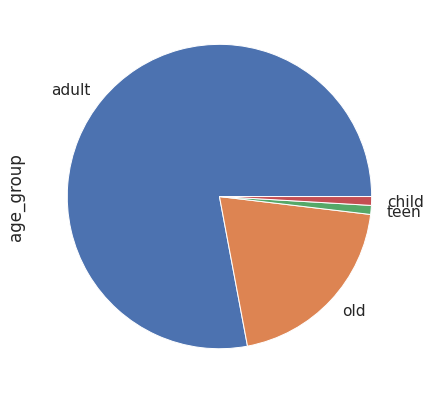

In [ ]:
train['age_group'].value_counts().plot(kind='pie',figsize=(9,7))

<AxesSubplot:>

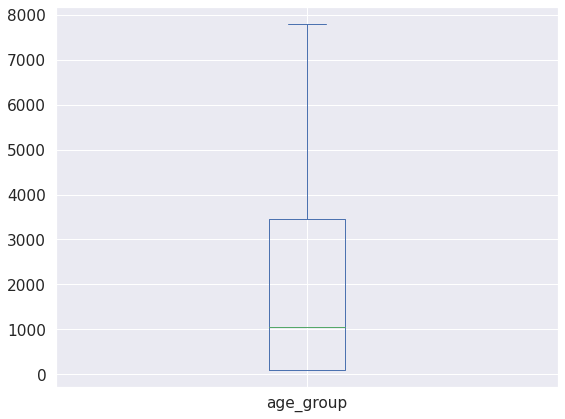

In [ ]:
train['age_group'].value_counts().plot(kind='box',figsize=(9,7))

## Visualize Lab Parameter

<AxesSubplot:>

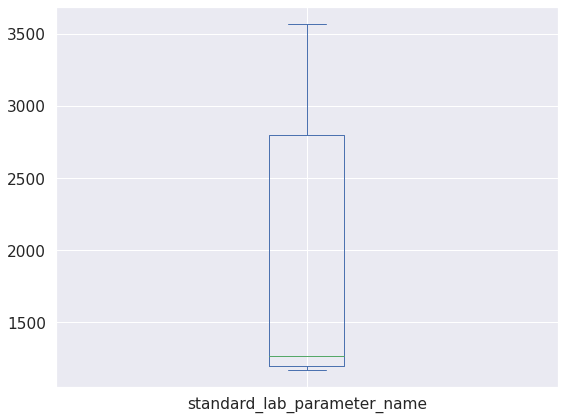

In [ ]:
train['standard_lab_parameter_name'].value_counts().plot(kind='box',figsize=(9,7))

<AxesSubplot:ylabel='standard_lab_parameter_name'>

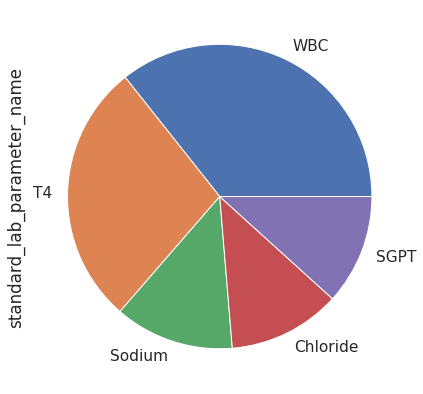

In [ ]:
train['standard_lab_parameter_name'].value_counts().plot(kind='pie',figsize=(9,7))

## Visualize Units in dataset

<AxesSubplot:>

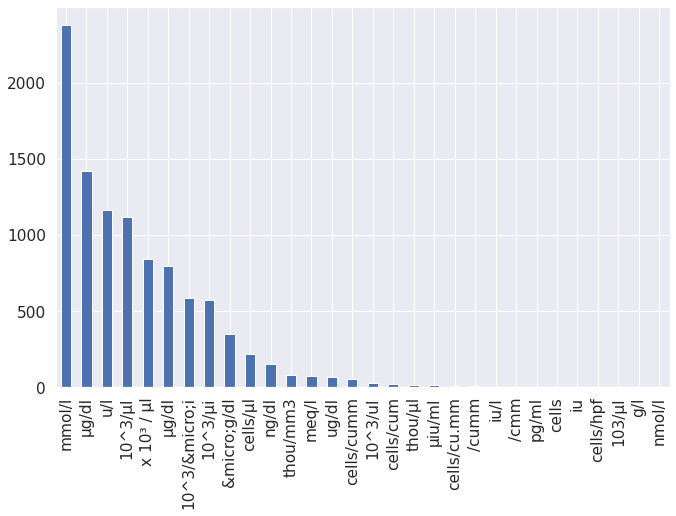

In [ ]:
train.unit.value_counts().plot(kind='bar',figsize=(11,7))

## Visualize unit and lab parameters

<AxesSubplot:xlabel='standard_lab_parameter_name,unit'>

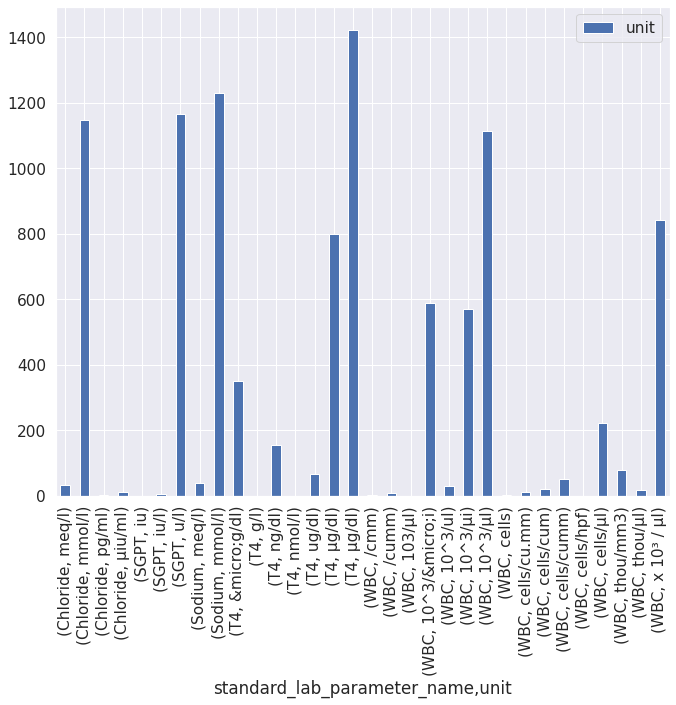

In [ ]:
train.groupby(['standard_lab_parameter_name',"unit"]).agg({"unit":"count"}).plot(kind='bar',figsize=(11,9))

In [ ]:
# train.drop(['patient_id'],axis=1,inplace=True)
# test.drop(['patient_id'],axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'patient_id'}>,
        <AxesSubplot:title={'center':'parameter_value'}>],
       [<AxesSubplot:title={'center':'reference_high'}>,
        <AxesSubplot:title={'center':'reference_low'}>]], dtype=object)

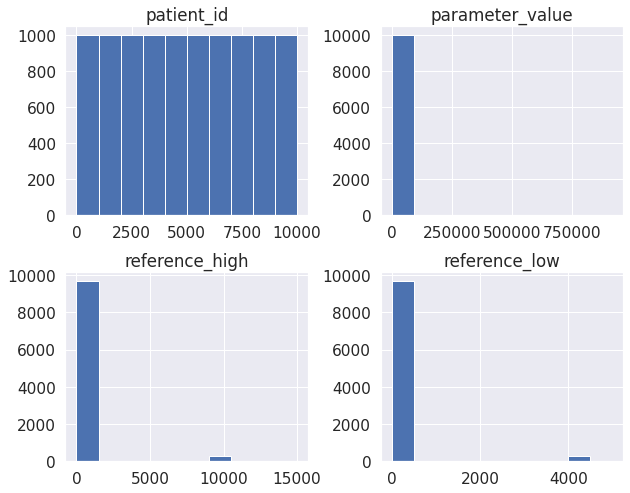

In [ ]:
train.hist(figsize=(10,8))

## Plotting  Correlation

<AxesSubplot:>

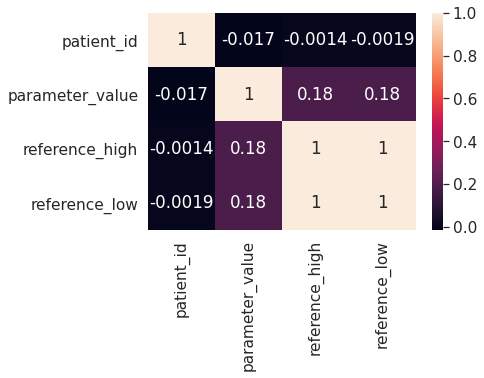

In [ ]:
sb.heatmap(train.corr(), annot = True)

<AxesSubplot:>

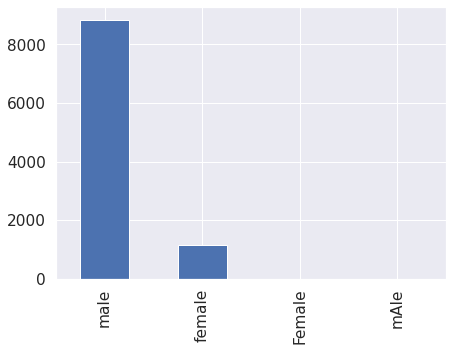

In [ ]:
train['gender'].value_counts().plot(kind='bar',figsize=(7,5))

<AxesSubplot:>

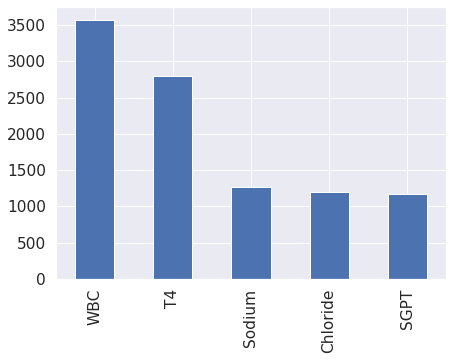

In [ ]:
#Chlorine

train.standard_lab_parameter_name.value_counts().plot(kind='bar',figsize=(7,5))

## Organizing data in model training format

In [ ]:
train.drop(['created_at','patient_id'],axis=1,inplace=True)

gender_encode = {'male': 1,'female': 0}
train['gender'] = train['gender'].str.lower()

train['gender'] = train['gender'].replace(gender_encode)

x = train.drop(['gender'],axis=1)
x = pd.get_dummies(x) 
y = train['gender']

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=2)


In [ ]:
# train['Year'] = train['created_at'].dt.year
# train['Month'] = train['created_at'].dt.month
# train['Day'] = train['created_at'].dt.day

In [ ]:
x_train.shape,  y_train.shape

((8000, 42), (8000,))

## Using RandomForest to train model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8635


In [ ]:
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(clf, x, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))


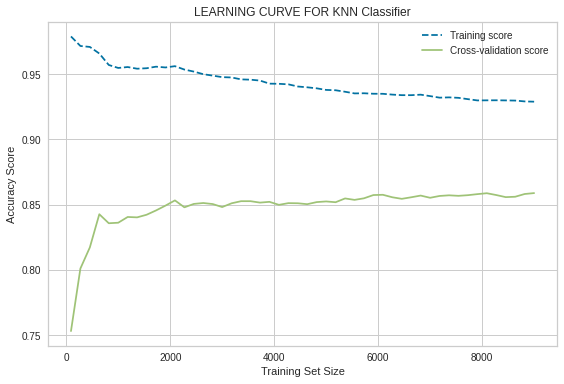

In [ ]:
import matplotlib.pyplot as plt

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Chloride Analysis

In [41]:
train = pd.read_csv("training_data.csv")
test = pd.read_csv('test_data.csv')

test = test.loc[:, ~test.columns.str.contains('^Unnamed')]


data = pd.concat([train,test],axis=0)
data.sample(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
5483,5483,Chloride,103.00,mmol/l,2019-05-05 12:11:58.097,107.0,98.0,adult,female
9882,9882,Sodium,141.00,mmol/l,2020-11-12 11:31:12.132213+00:00,145.0,136.0,old,NaN
4339,4339,T4,9.20,μg/dl,2019-12-22 19:50:31.002325+00:00,11.0,5.5,adult,male
7213,7213,WBC,11.20,10^3/μi,2020-11-02 18:31:41.394109+00:00,10.0,4.0,adult,NaN
6396,6396,WBC,4.74,10^3/μl,2019-09-07 05:22:10.486355+00:00,9.9,5.7,child,male


In [42]:
data = data.loc[data['standard_lab_parameter_name']=='Chloride']
data.sample(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
1523,1523,Chloride,106.0,mmol/l,2020-11-07 00:47:42.315256+00:00,107.0,98.0,adult,NaN
2531,2531,Chloride,104.0,mmol/l,2020-10-26 16:08:58.443424+00:00,109.0,101.0,adult,NaN
8262,8262,Chloride,106.0,mmol/l,2020-11-06 04:05:58.956922+00:00,107.0,98.0,old,NaN
6045,6045,Chloride,96.0,mmol/l,2020-11-12 08:47:24.821478+00:00,107.0,98.0,old,NaN
7736,7736,Chloride,104.6,mmol/l,2019-05-27 06:31:19.390174+00:00,108.0,98.0,adult,male


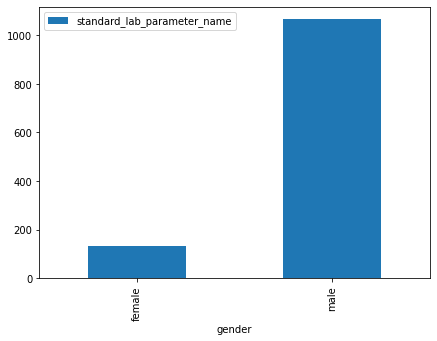

In [62]:
data.groupby(['gender']).agg({'standard_lab_parameter_name':'count'}).plot(kind='bar',figsize=(7,5))

In [69]:
data_chloride_108_value = data.loc[data['parameter_value'] > 108]
data_chloride_108_value.groupby(['gender']).agg({'standard_lab_parameter_name':'count'})

,standard_lab_parameter_name
gender,
female,4
male,25


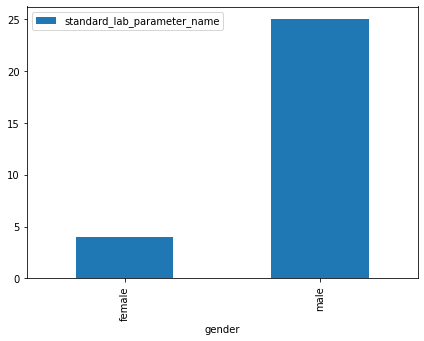

In [70]:
data_chloride_108_value.groupby(['gender']).agg({'standard_lab_parameter_name':'count'}).plot(kind='bar',figsize=(7,5))

In [71]:
data_chloride_95_value = data.loc[data['parameter_value'] < 95]
data_chloride_95_value.groupby(['gender']).agg({'standard_lab_parameter_name':'count'})

,standard_lab_parameter_name
gender,
female,2
male,29


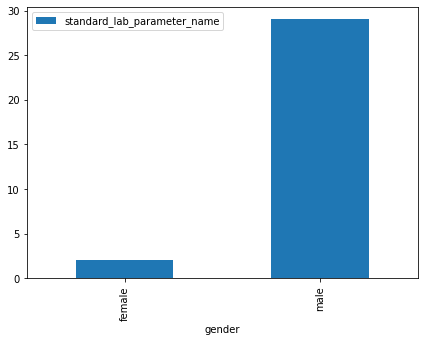

In [72]:
data_chloride_95_value.groupby(['gender']).agg({'standard_lab_parameter_name':'count'}).plot(kind='bar',figsize=(7,5))

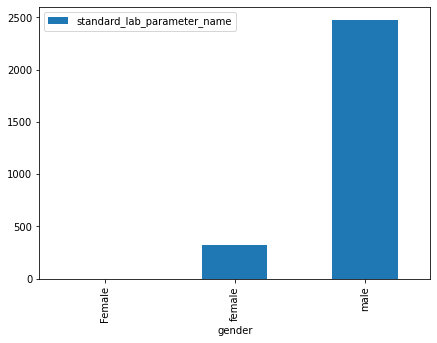

In [13]:
data.groupby(['gender']).agg({'standard_lab_parameter_name':'count'}).plot(kind='bar',figsize=(7,5))

In [63]:
data.groupby(['age_group']).agg({'standard_lab_parameter_name':'count'})

,standard_lab_parameter_name
age_group,
adult,1808
child,23
old,573
teen,23


## WBC Analysis

In [5]:
train = pd.read_csv("training_data.csv")
test = pd.read_csv('test_data.csv')

test = test.loc[:, ~test.columns.str.contains('^Unnamed')]


data = pd.concat([train,test],axis=0)
data.sample(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
5003,5003,WBC,7.2,10^3/μi,2019-11-28 02:28:01.746787+00:00,10.0,4.0,adult,male
8110,8110,WBC,9.3,10^3/μi,2020-11-18 13:49:56.770378+00:00,10.0,4.0,adult,NaN
5492,5492,WBC,6.6,10^3/μl,2020-11-11 15:28:41.958324+00:00,10.0,4.0,adult,NaN
2895,2895,Sodium,140.0,mmol/l,2020-11-18 14:52:38.659789+00:00,145.0,136.0,adult,NaN
2255,2255,T4,9.4,μg/dl,2019-11-19 08:53:09.846000+00:00,12.0,4.5,adult,male


In [6]:
data = data.loc[data['standard_lab_parameter_name']=='WBC']
data.sample(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
3992,3992,WBC,5.90,x 10³ / µl,2019-11-23 13:38:41.224,10.0,4.0,adult,male
3245,3245,WBC,6.02,10^3/μl,2020-11-15 12:23:40.893840+00:00,9.7,5.4,child,NaN
2314,2314,WBC,7.80,10^3/μl,2020-11-03 16:07:31.543883+00:00,10.0,4.0,adult,NaN
7293,7293,WBC,9.84,10^3/μl,2019-10-02 13:31:24.878144+00:00,10.0,4.0,adult,male
1280,1280,WBC,8.90,10^3/μi,2020-11-20 13:54:23.580817+00:00,10.0,4.0,adult,NaN


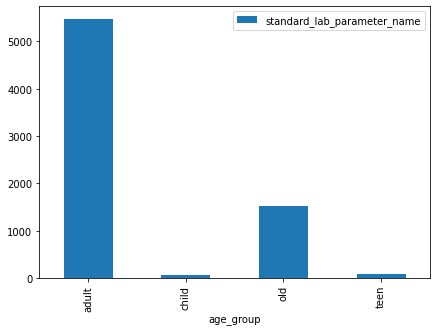

In [7]:
data.groupby(['age_group']).agg({'standard_lab_parameter_name':'count'}).plot(kind='bar',figsize=(7,5))

## T4 Analysis

In [8]:
train = pd.read_csv("training_data.csv")
test = pd.read_csv('test_data.csv')

test = test.loc[:, ~test.columns.str.contains('^Unnamed')]


data = pd.concat([train,test],axis=0)
data.sample(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
4708,4708,WBC,10.80,10^3/&micro;i,2019-12-24 15:27:59.396,10.0,4.0,adult,male
9363,9363,WBC,6.60,10^3/μi,2020-10-31 13:31:52.009944+00:00,10.0,4.0,adult,NaN
9316,9316,WBC,7.02,10^3/μl,2019-12-17 14:17:48.585883+00:00,10.0,4.0,adult,male
6892,6892,Chloride,104.90,mmol/l,2019-10-15 12:54:19.588516+00:00,107.0,98.0,adult,male
2690,2690,T4,5.90,µg/dl,2019-06-26 22:37:08.787,12.0,4.5,adult,male


In [9]:
data = data.loc[data['standard_lab_parameter_name']=='T4']
data.sample(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
3297,3297,T4,8.9,μg/dl,2019-11-19 01:07:38.038613+00:00,12.00,4.50,adult,female
9682,9682,T4,6.8,μg/dl,2019-11-26 14:07:55.901892+00:00,12.00,4.50,old,male
1760,1760,T4,7.9,μg/dl,2020-11-12 07:33:44.645007+00:00,12.00,4.50,adult,NaN
6385,6385,T4,9.6,μg/dl,2019-09-14 07:33:40.414533+00:00,12.00,4.50,adult,male
7286,7286,T4,5.8,μg/dl,2020-11-16 16:08:32.290193+00:00,11.72,4.87,adult,NaN


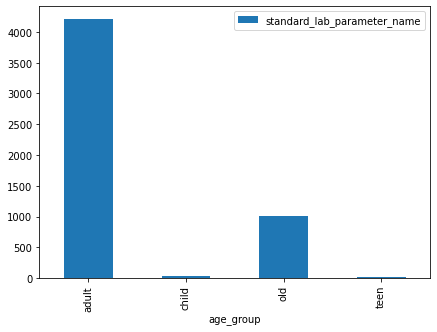

In [10]:
data.groupby(['age_group']).agg({'standard_lab_parameter_name':'count'}).plot(kind='bar',figsize=(7,5))